# Import Libraries

In [1]:
# roc curve and auc on imbalanced dataset

# Import required libraries

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib import pyplot




# Create Dataset

Next, we create a two-class dataset.

In [2]:
# Create two class dataset
x, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# Create Training and Test Sets

The data is split into two sets: a training set and a test set.
The test set is set to 70% of the whole dataset.

In [3]:
# split into train/test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)

# Fit a Model

In this example, the KNeighboursClassifier is used. More information can be obtained here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. The input consists of the k closest training examples in the feature space. 

For classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
For regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.


In [4]:
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainx, trainy)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Predicting Probabilities

Here, we predict probabilities and assign them to the variable predictedprobabilities.

In [5]:
# predict probabilities
predictedprobabilities = model.predict_proba(testx)
# keep probabilities for the positive outcome only
predictedprobabilities = predictedprobabilities[:, 1]



In [8]:


# predict class values
yhat = model.predict(testx)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, predictedprobabilities)
# calculate F1 score
f1 = f1_score(testy, yhat)



# Calculate AUC

AUC stands for “area under curve”. It refers to the amount of area under the ROC curve, which theoretically is a value between 0 and 1. 

The worst possible curve in practice is a diagonal line, because this means that it is at the same level of chance.

Using the AUC metric you can quickly compare multiple learning models. 

Unlike accuracy, precision, recall and F1 score, AUC does not tell us what performance to expect from the model for a given threshold setting. Also, it cannot be used to determine the optimal value for threshold. AUC is only one measure and we need the others to build up a pattern of understanding. 



In [9]:
# calculate AUC
auc = roc_auc_score(testy, predictedprobabilities)
print('AUC: %.3f' % auc)

ap = average_precision_score(testy, predictedprobabilities)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))


AUC: 0.895
f1=0.836 auc=0.895 ap=0.840


# Calculate ROC Curve


A higher value on the horizontal axis implies worse performance, while on the vertical axis a higher value implies a better performance


In [10]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, predictedprobabilities)


# Data Visualization

There's no substitute for seeing it in action.

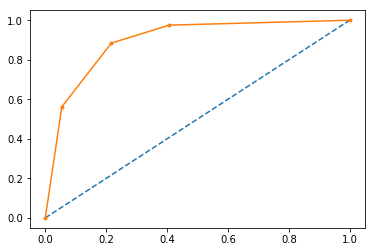

f1=0.836 auc=0.895 ap=0.840


In [11]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.savefig('conf.png')
pyplot.show()


print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

The model has a lot of value. 